# Lecture 3: Bivariate Relationships: Scatterplots, Correlation, and Two-Way Tables

#### Note: This lecture is to visually demonstrate the lecture materials. The goal is not to understand every line of code
#### The goal is not to understand every line of code
#### This lesson roughly corresponds to the discussion section [here](https://github.com/corybaird/PLCY_610_public/blob/master/Discussion_sections/Disc4_PS2/Disc4_PS2.ipynb)

# A.1 Import libraries

In [18]:
library(dplyr) #data manipulation
library(ggplot2) #graphing
library(ggthemes) #graphing
library(downloader) #Download data from the internet
library(readxl) #Read excel files
options(warn=-1) #Hide warnings

### A.1.1 If there is an error you must download the packages
- Generally speaking you only need to do this one time

In [2]:
#install.packages('dplyr')
#install.packages('ggplot2')
#install.packages('ggthemes')
#install.packages('xlsx')

## Outline

1. [Bivariate relationships](#Section_1)
2. [Two-way tables](#Section_2)
3. [Scatterplots](#Section_4)
4. [Correlation](#Section_5)
5. [Correlation and causation](#Section_6)

<a id='Section_1'></a>
# 1. Bivariate relationships
- See lecture notes

<a id='Section_2'></a>

# 2. Two-way tables

## 2.1 Download data

### 2.1.1 Downloads the data into your local folder
- Data from [this](http://www.matthewfuhrmann.com/datasets.html) website

In [3]:
url = 'http://www.matthewfuhrmann.com/uploads/2/5/8/2/25820564/nl_dataset_v.1.2.xlsx' #URL of data
file_name = "Nuke_data.xlsx" #Choose your data name
download.file(url, file_name) 

### 2.1.2 Read the excel file which is now in your folder

In [4]:
df = read_excel(file_name) #Read data into dataframe
df %>% head(2) #Show first 2 rows

country_name,ccode,facility_name,facility_ambiguity,enr_type,size,construction_start,construction_end,operation_start,operation_end,operation2_start,operation2_end,covert,iaea,regional,military,military_ambiguity,multinational,foreign_assistance,foreign_assistance_ambiguity
Algeria,615,Hot cell facility at Ain Oussera,0,1,1,1986,1992,1992,7777,NA,NA,1,1,0,0,1,0,1,0
Argentina,160,Ezeiza – SF Reprocessing Facility,0,1,1,1968,1968,1968,1973,NA,NA,0,0,0,0,1,0,0,1


### 2.1.3 Advanced commands for data manipulation
- These are advanced commands that you do not need to know for the purpose of this excercise


In [5]:
#Create construction length variable
df$length = df$construction_end-df$construction_start 

#Create operation length
df$operation_years = df$operation_end-df$operation_start 


#Create dummy variable for those reactors that took over 10 years to construct
df$ten_year_construction = as.numeric(df$length>10) 

#Remove -99 observation row from the dataframe
df = df %>% filter(foreign_assistance!=-99) 

df = df %>% filter(operation_years!=-99 & operation_years<100 & length<100 & length>0 & operation_years>0) 

## 2.2 Two-way tables

### 2.2.1 Basic table

#### 2.2.1.1 Function: table(DF_NAME$Col_Name)

In [6]:
freq_table = table(df$ten_year_construction) #Creates frequency table
rownames(freq_table) =  c('Under 10-yr','Over 10-yr') #Adds column names
freq_table #Shows freq_table


Under 10-yr  Over 10-yr 
         91           4 

#### 2.2.1.1.1 prop.table(table_name)
- Shows percentages of above table

In [7]:
prop.table(freq_table)


Under 10-yr  Over 10-yr 
 0.95789474  0.04210526 

#### 2.2.1.2 Function: count(Col_Name)
- DPLYR library must be loaded to use this function

In [8]:
df %>% 
count(ten_year_construction)

ten_year_construction,n
0,91
1,4


#### 2.2.1.2.1 Same function as above but transposed so it looks like 2.2.1.1

In [9]:
df %>% 
count(ten_year_construction) %>% 
t() #Transpose

ten_year_construction,0,1
n,91,4


### 2.2.2 Two-way table

#### 2.2.2.1  Function: table(DF_NAMECol_Name_1, DF_NAMECol_Name_2)

In [10]:
#Creates tables
freq_table_twoway = table(df$foreign_assistance,df$ten_year_construction)
#Renames cols
colnames(freq_table_twoway) = c('Under 10-yr','Over 10-yr') 
#Renames rows
rownames(freq_table_twoway) = c('No assistance', 'Assistance')
#Displays data
freq_table_twoway 

               
                Under 10-yr Over 10-yr
  No assistance          67          4
  Assistance             24          0

#### 2.2.2.1.1 prop.table(table_name)
- Shows percentages of above table

In [11]:
prop.table(freq_table_twoway)

               
                Under 10-yr Over 10-yr
  No assistance  0.70526316 0.04210526
  Assistance     0.25263158 0.00000000

#### 2.2.2.2 Function: count(Col_Name)

In [12]:
df %>% group_by(foreign_assistance) %>% 
summarise(Under_10_year = sum(ten_year_construction==0),
          Over_10_year = sum(ten_year_construction==1)
          )

foreign_assistance,Under_10_year,Over_10_year
0,67,4
1,24,0


<a id='Section_3'></a>
# 3. Scatterplots
Resources for scatterplots can also be found:
- [PS2](https://github.com/corybaird/PLCY_610_public/blob/master/Discussion_sections/Disc4_PS2/Disc4_PS2.ipynb)
    - Shows ggplot and plot functions
- [ggplot2 tutorial](https://github.com/corybaird/Development_economics/tree/master/TA_Sessions/R/W3_ggplot)
    - Shows only ggplot2 functions

## 3.1 Basic scaterplots

### 3.1.1 Function: plot(DF_NAMECol_Name_1, DF_NAMECol_Name_2)

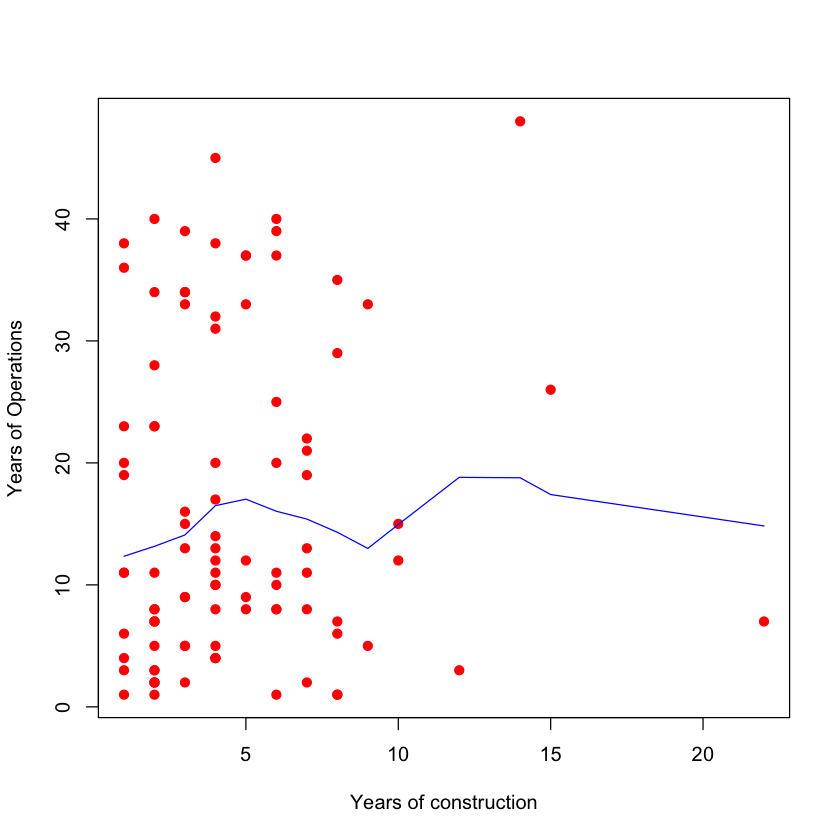

In [13]:
#Scatter
plot(df$length, #y data
     df$operation_years, #x data
    col='red',#dot:outside color
    bg='red', #dot: background color
    ylab= 'Years of Operations', #ylabel
    xlab='Years of construction',#xlabel
    pch=21#shape
    )

#Regression line

#Lowess line
lines(lowess(df$length, df$operation_years),
      col="blue")

### 3.1.2 Function: ggplot()

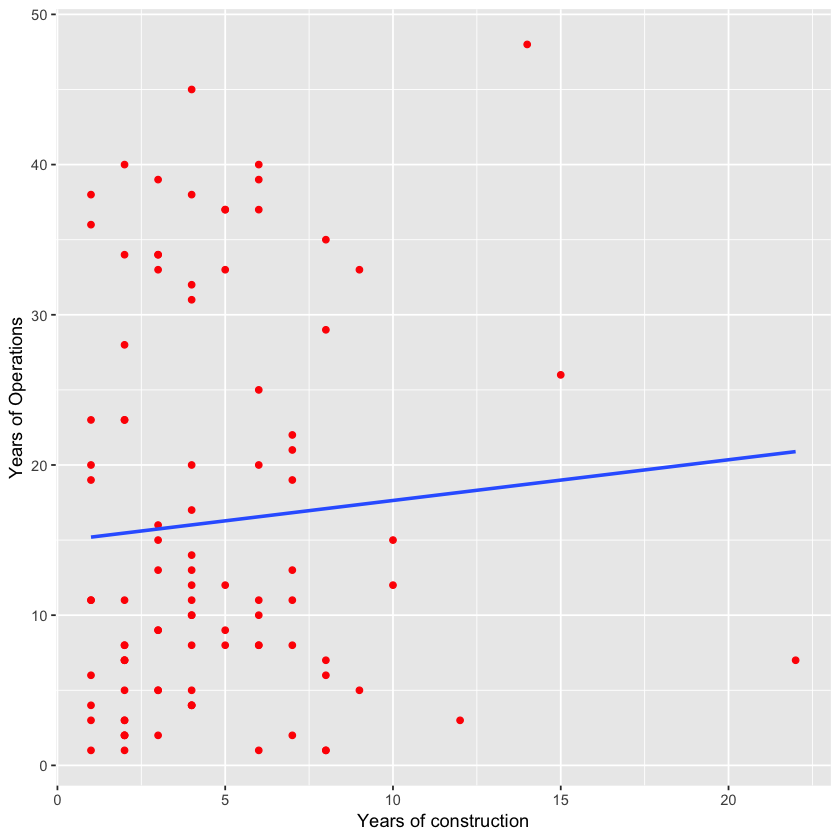

In [14]:
df %>% 
ggplot(aes(x=length, y=operation_years)) +
geom_point(color='red')+ 
geom_smooth(method = "lm", se = FALSE)+
ylab('Years of Operations')+
xlab('Years of construction')

## 3.2 Log transformation

### 3.2.1 Create log variable

In [15]:
df = df %>% 
mutate (log_operations = log(operation_years),
        log_construction = log(length))

### 3.2.2 Plot logged variables

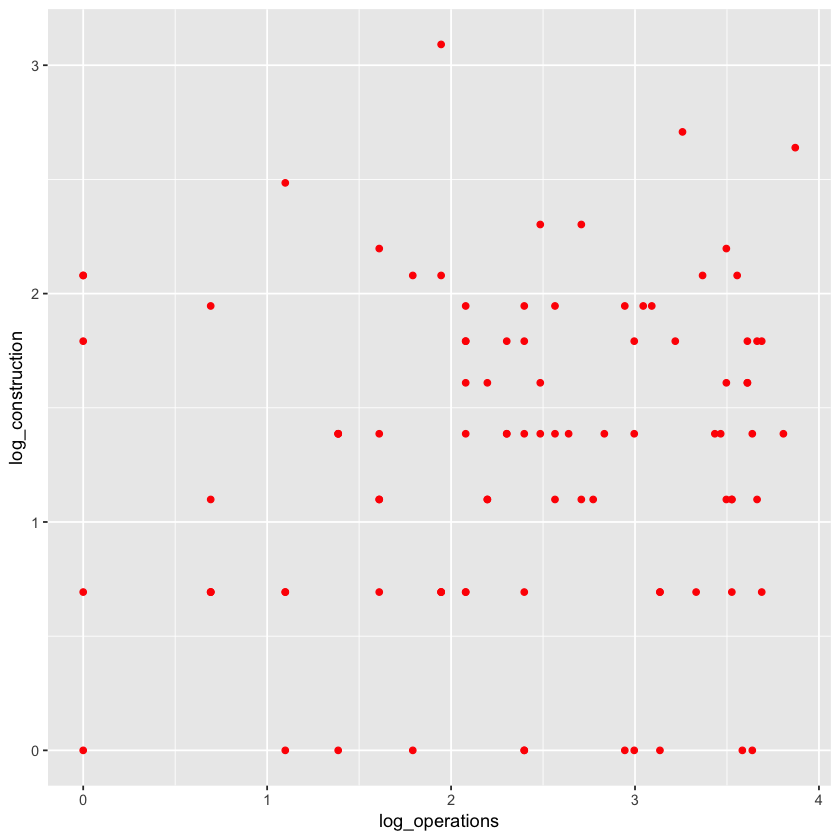

In [16]:
df %>% 
ggplot(aes(x=log_operations, y=log_construction)) +
geom_point(color='red')

# 4. Correlation
<a id='Section_4'></a>


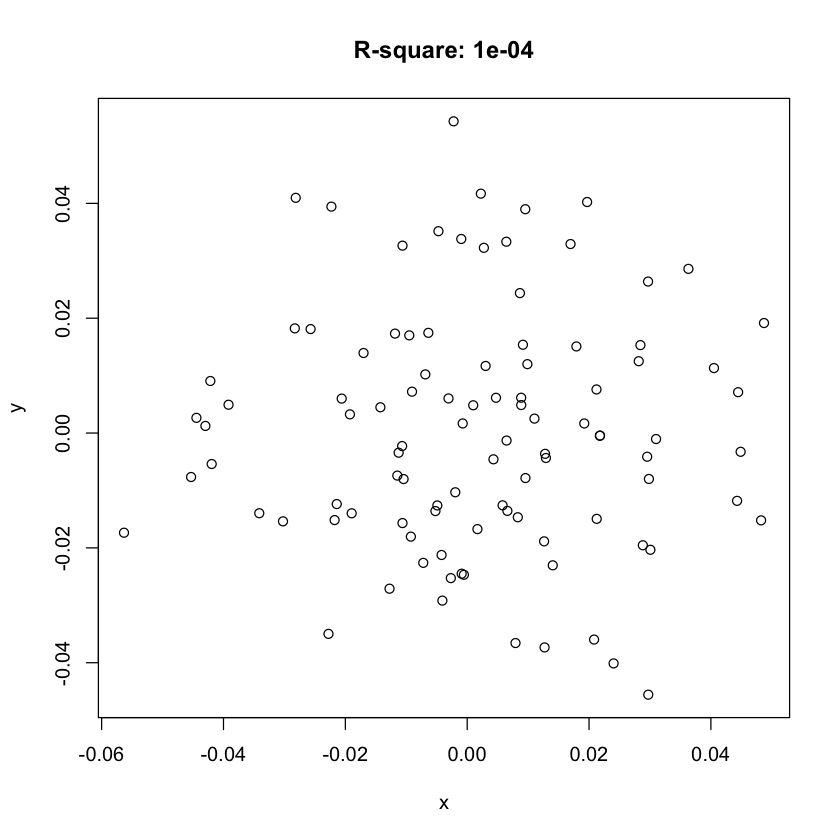

In [17]:
x = rnorm(100, mean=0, sd=.02)
y = rnorm(100, mean=0, sd=.02)
rsquare = summary(lm(y~x))$r.squared
plot(
x,
y,
main =paste('R-square:', round(rsquare,4)))